In [1]:
import logging

from dotenv import load_dotenv

from template_langgraph.loggers import get_logger

_ = load_dotenv(
    override=True,
    verbose=True,
)

logger = get_logger(__name__)
logger.setLevel(logging.DEBUG)

In [2]:
from uuid import uuid4

from template_langgraph.agents.news_summarizer_agent.agent import NewsSummarizerAgent
from template_langgraph.agents.news_summarizer_agent.models import (
    AgentInputState,
    AgentState,
    Article,
)

graph = NewsSummarizerAgent().create_graph()

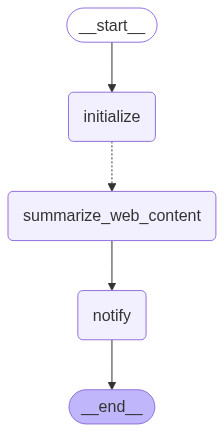

In [3]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
for event in graph.stream(
    input=AgentState(
        input=AgentInputState(
            prompt="Please summarize the articles in Japanese briefly in 3 sentences.",
            id=str(uuid4()),
            urls="https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/index.md,https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/deployment.md".split(
                ","
            ),  # noqa: E501
        ),
        articles=[],
    )
):
    logger.info("-" * 20)
    logger.info(f"Event: {event}")

articles: list[Article] = event["notify"]["articles"]
for article in articles:
    logger.info(f"{article.structured_article.model_dump_json(indent=2)}")

2025-08-14 11:48:41,397 [    INFO] Initializing state: input=AgentInputState(prompt='Please summarize the articles in Japanese briefly in 3 sentences.', id='ecdd1da7-cf77-461e-85cd-fce04365b4c0', urls=['https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/index.md', 'https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/deployment.md']) articles=[] (agent.py:60)
2025-08-14 11:48:41,398 [    INFO] Running subtasks with state: input=AgentInputState(prompt='Please summarize the articles in Japanese briefly in 3 sentences.', id='ecdd1da7-cf77-461e-85cd-fce04365b4c0', urls=['https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/index.md', 'https://raw.githubusercontent.com/ks6088ts-labs/template-langgraph/refs/heads/main/docs/deployment.md']) articles=[] (agent.py:66)
2025-08-14 11:48:41,398 [    INFO] -------------------- (940111335.py:13)
2025-08-14 11:48:41,398 [    INFO] Event: {'initi